In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def load_nifti(file_path):
    # Load the NIfTI image
    nii_image = nib.load(file_path)

    # Access the image data as a Numpy array
    data_array = nii_image.get_fdata()

    return data_array

def show_nifti(file_data, slice=20):
    plt.imshow(file_data[:, :, slice], cmap='gray')  # Display a single slice (change the slice index as needed)
    plt.title('NIfTI Image')
    plt.colorbar()
    plt.show()

def show_label_seg_nifti(label, seg, slice=20):
    plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.imshow(label[:, :, slice], cmap='gray')  # Display a single slice (change the slice index as needed)
    plt.title('Label Image')
    plt.colorbar()
    # plt.show()

    plt.subplot(1, 2, 2)
    plt.imshow(seg[:, :, slice], cmap='gray')  # Display a single slice (change the slice index as needed)
    plt.title('Segmentation Image')
    plt.colorbar()
    plt.show()


def dice_coefficient(mask1, mask2):
    # Ensure the masks have the same shape
    if mask1.shape != mask2.shape:
        raise ValueError("Input masks must have the same shape.")

    # Compute the intersection and union of the masks
    intersection = np.sum(mask1 * mask2)
    union = np.sum(mask1) + np.sum(mask2)

    # Calculate the Dice coefficient
    dice = (2.0 * intersection) / (union + 1e-8)  # Add a small epsilon to avoid division by zero

    return dice


Tissue and labels shapes:  (240, 240, 48) (240, 240, 48)
Dice Score: 0.7356024759709456


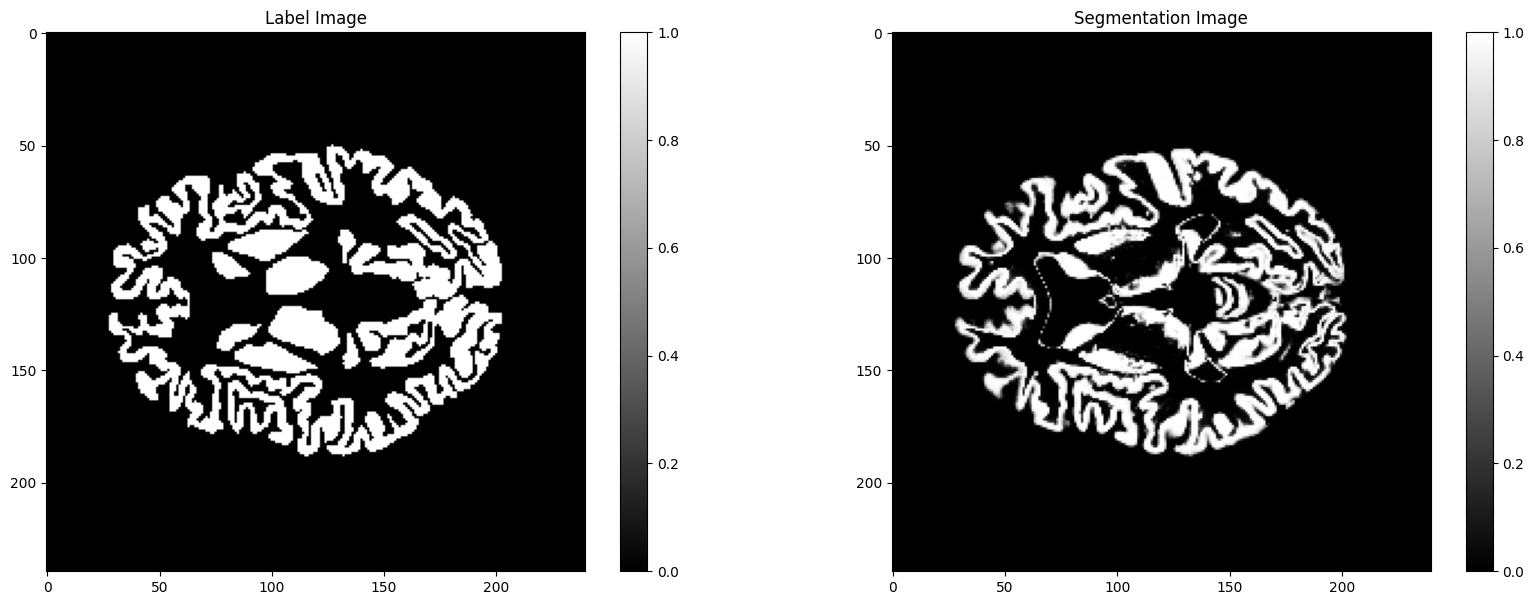

In [29]:

parameter_folder    = 'results_60_0.0'

# c1  = GM , c2 = WM , c3 = CSF
tissue_file         = 'c1T1.nii'

test_label_file     = 'LabelsForTesting.nii'
subject             = '1'

tissue_path         = os.path.join('../P2_data/', subject, parameter_folder, tissue_file)
labels_path         = os.path.join('../P2_data/', subject, test_label_file)

tissue = load_nifti(tissue_path)
labels = load_nifti(labels_path)

# CSF = 1  , GM = 2  , WM = 3
labels_CSF = labels == 1
labels_GM  = labels == 2
labels_WM  = labels == 3

dice_score = dice_coefficient(labels_GM, tissue)

print("Tissue and labels shapes: " , tissue.shape, labels.shape)
print("Dice Score:", dice_score)

# Visualizing the label mask and segmentation
show_label_seg_nifti(label=labels_GM, seg=tissue)
